<a href="https://colab.research.google.com/github/21-LAKSHMI/AI-AND-ML/blob/main/Weather_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to analyze the data pandas is used
import pandas as pd

In [2]:
# reading the dataset from folder
dataset=pd.read_csv("/content/Project 1 - Weather Dataset.csv")

In [3]:
# displaying the information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [4]:
# printing the dataset
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
# checking the value for weather
dataset["Weather"].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [6]:
#categorizing the prediction column under 4 to 5 category
def categorize_weather(condition):
    cond = condition.lower()

    if "clear" in cond:
        return "Clear"

    elif any(word in cond for word in ["snow", "pellets", "freezing drizzle"]):
        return "Snowy"

    elif any(word in cond for word in ["rain", "drizzle", "shower", "thunderstorm"]):
        return "Rainy"

    elif any(word in cond for word in ["cloudy", "fog", "haze"]):
        return "Cloudy"

    else:
        return "Cloudy"

In [7]:
# storing the changed data into weather column
dataset["Weather"] = dataset["Weather"].apply(categorize_weather)

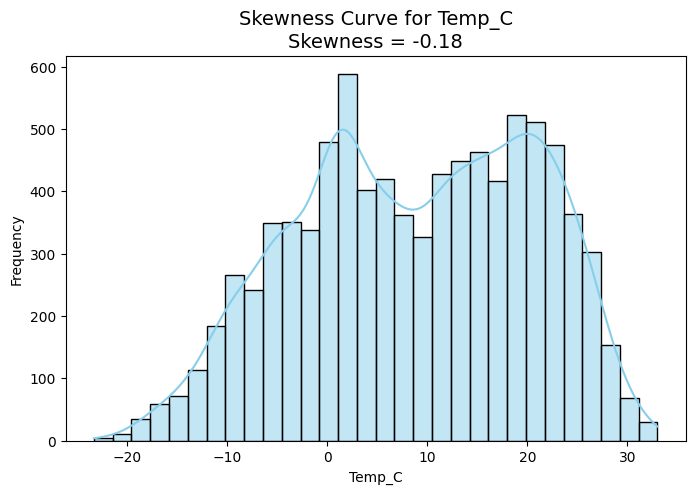

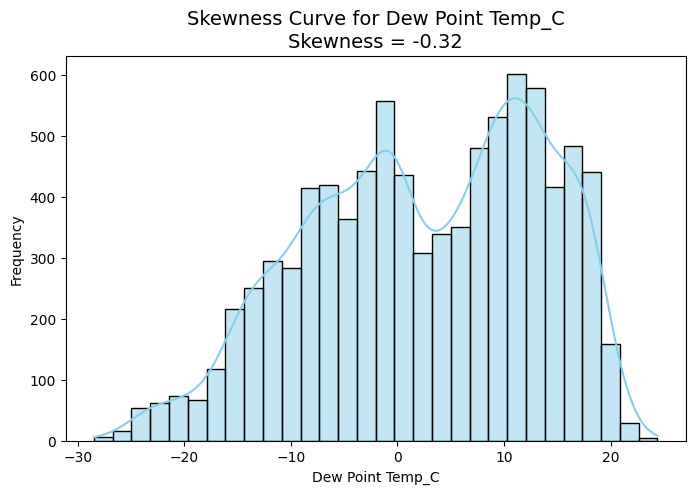

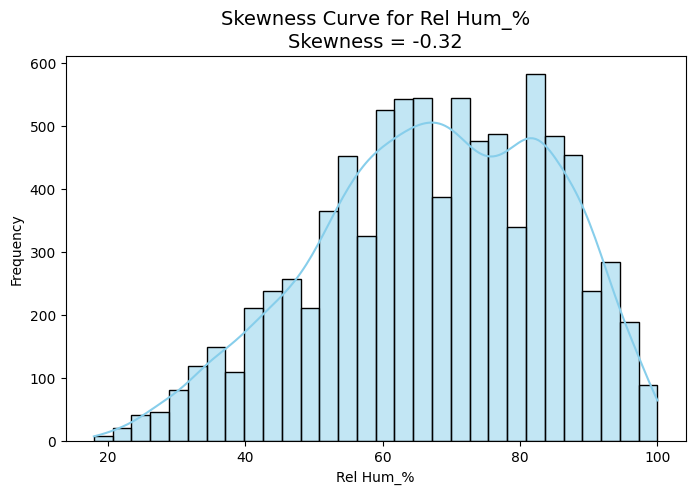

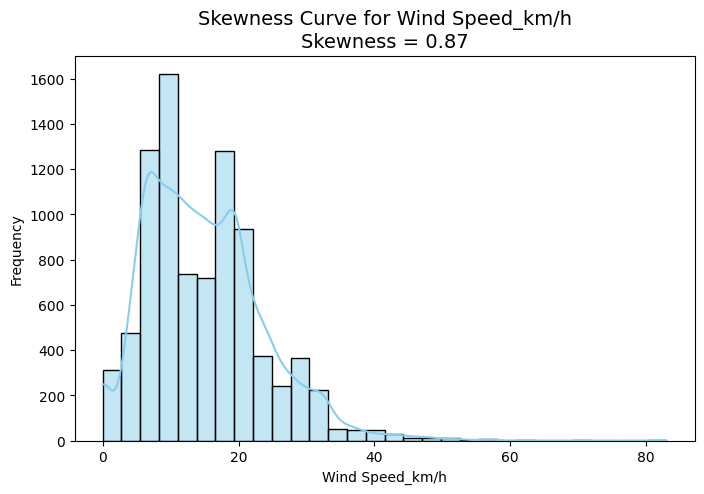

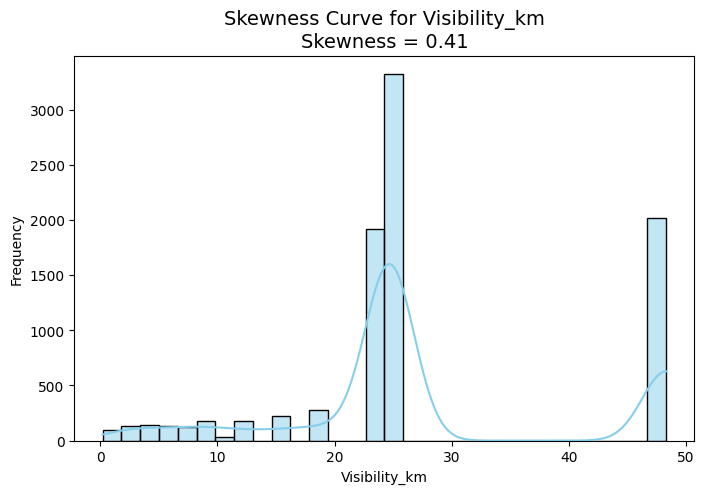

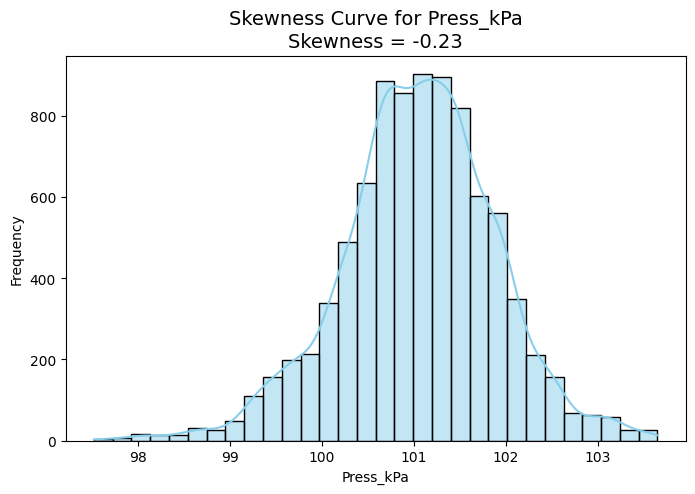

In [8]:
# checking skewness for all the numerical columns
# importing matplotlib for plotting the graph
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
num_cols = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%",
            "Wind Speed_km/h", "Visibility_km", "Press_kPa"]

# Plot skewness curve for each column
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(dataset[col], kde=True, bins=30, color="skyblue")
    skew_val = dataset[col].skew()
    plt.title(f"Skewness Curve for {col}\nSkewness = {skew_val:.2f}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

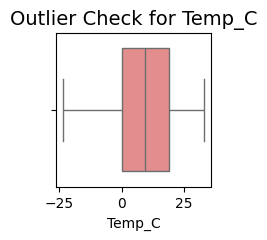

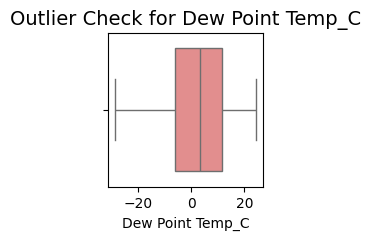

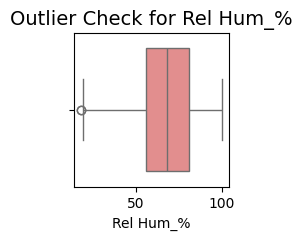

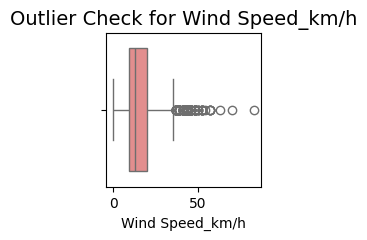

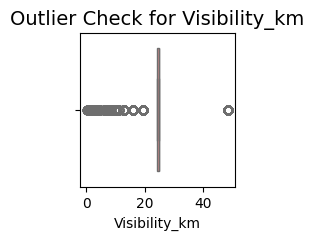

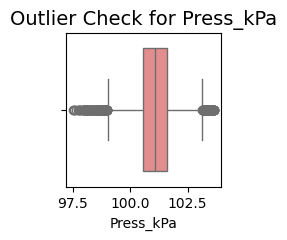

In [9]:
# importing matplotlib for plotting the boxplot
# Detecting outliers using boxplot visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
num_cols = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%",
            "Wind Speed_km/h", "Visibility_km", "Press_kPa"]

# Boxplots for each column
for col in num_cols:
    plt.figure(figsize=(2,2))
    sns.boxplot(x=dataset[col], color="lightcoral")
    plt.title(f"Outlier Check for {col}", fontsize=14)
    plt.show()

In [10]:
# Using IQR to detect outliers in numeric value
num_cols = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%",
            "Wind Speed_km/h", "Visibility_km", "Press_kPa"]

outliers_iqr = {}

for col in num_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = dataset[(dataset[col] < lower) | (dataset[col] > upper)][col]
    outliers_iqr[col] = outliers

# Print number of outliers per column
for col in num_cols:
    print(f"{col}: {len(outliers_iqr[col])} outliers")

Temp_C: 0 outliers
Dew Point Temp_C: 0 outliers
Rel Hum_%: 2 outliers
Wind Speed_km/h: 162 outliers
Visibility_km: 3539 outliers
Press_kPa: 207 outliers


In [11]:
# checking skewness in numeric value
# Numerical columns
num_cols = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%",
            "Wind Speed_km/h", "Visibility_km", "Press_kPa"]

# Check skewness
for col in num_cols:
    skew_val = dataset[col].skew()
    print(f"{col}: Skewness = {skew_val:.2f}")

Temp_C: Skewness = -0.18
Dew Point Temp_C: Skewness = -0.32
Rel Hum_%: Skewness = -0.32
Wind Speed_km/h: Skewness = 0.87
Visibility_km: Skewness = 0.41
Press_kPa: Skewness = -0.23


In [12]:
# importing numpy
# Doing square root transformation to correct skewness
# import numpy as np

# dataset["Wind Speed_sqrt"] = np.sqrt(dataset["Wind Speed_km/h"])

# print("Wind Speed (sqrt):", dataset["Wind Speed_sqrt"].skew())


In [13]:
# Replacing the outliers using IQR
# Capping outliers using IQR
for col in num_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    dataset[col] = dataset[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers handled by capping using IQR.")

Outliers handled by capping using IQR.


In [14]:
# printing the replaced outliers
num_cols = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%",
            "Wind Speed_km/h", "Visibility_km", "Press_kPa"]

outliers_iqr = {}

for col in num_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = dataset[(dataset[col] < lower) | (dataset[col] > upper)][col]
    outliers_iqr[col] = outliers

# Print number of outliers per column
for col in num_cols:
    print(f"{col}: {len(outliers_iqr[col])} outliers")

Temp_C: 0 outliers
Dew Point Temp_C: 0 outliers
Rel Hum_%: 0 outliers
Wind Speed_km/h: 0 outliers
Visibility_km: 0 outliers
Press_kPa: 0 outliers


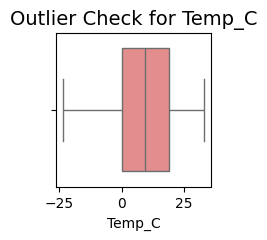

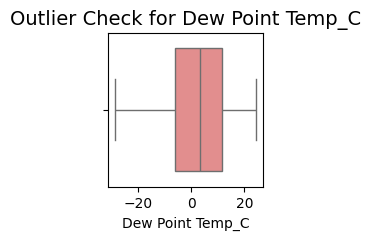

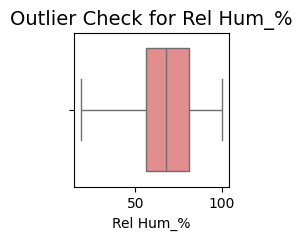

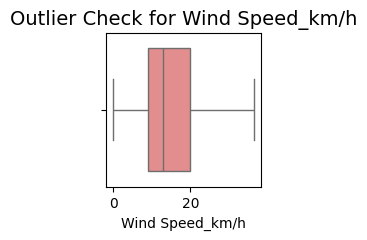

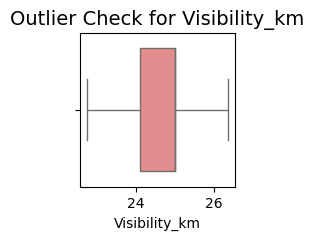

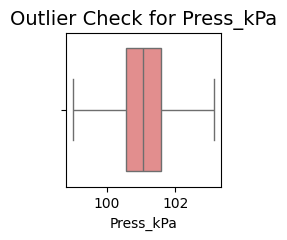

In [15]:
# importing matplotlib for plotting the graph
# checking the replaced outliers using visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Example: load your dataset
# df = pd.read_csv("your_dataset.csv")

# Numerical columns
num_cols = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%",
            "Wind Speed_km/h", "Visibility_km", "Press_kPa"]

# Boxplots for each column
for col in num_cols:
    plt.figure(figsize=(2,2))
    sns.boxplot(x=dataset[col], color="lightcoral")
    plt.title(f"Outlier Check for {col}", fontsize=14)
    plt.show()

In [16]:
# check skewness in numeric value
# Numerical columns
num_cols = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%",
            "Wind Speed_km/h", "Visibility_km", "Press_kPa"]

# Check skewness
for col in num_cols:
    skew_val = dataset[col].skew()
    print(f"{col}: Skewness = {skew_val:.2f}")

Temp_C: Skewness = -0.18
Dew Point Temp_C: Skewness = -0.32
Rel Hum_%: Skewness = -0.32
Wind Speed_km/h: Skewness = 0.53
Visibility_km: Skewness = -0.23
Press_kPa: Skewness = -0.10


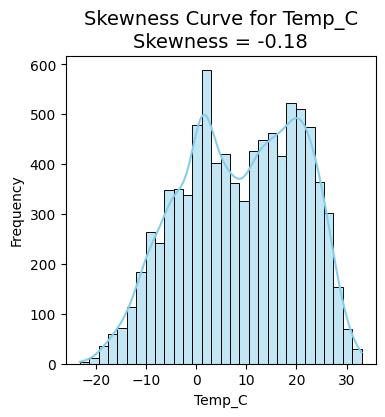

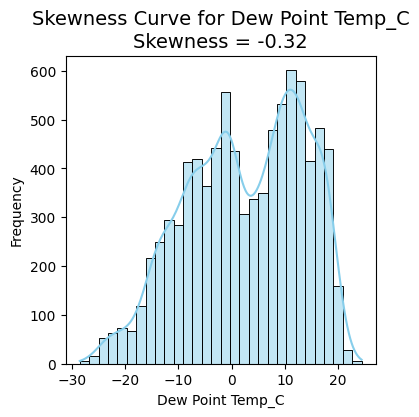

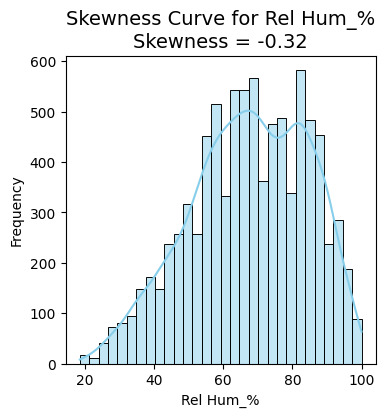

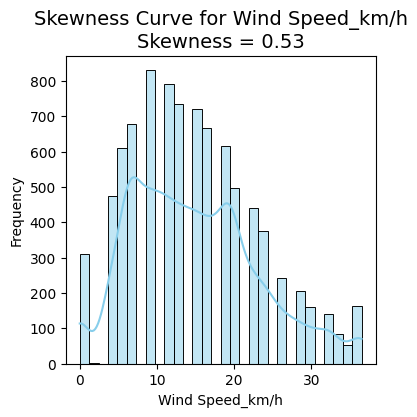

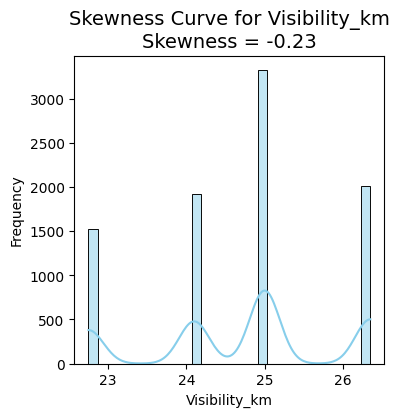

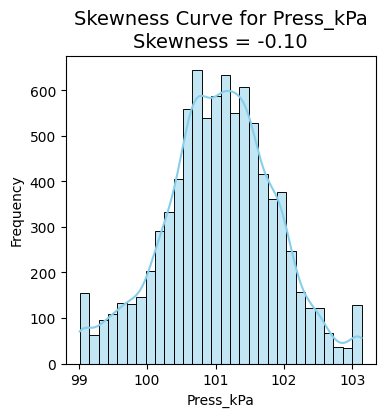

In [17]:
# importing matplotlib to plot skewness graph
# Checking skewness
import matplotlib.pyplot as plt
import seaborn as sns

# Example: load your dataset (replace with your file)
# df = pd.read_csv("your_dataset.csv")

# Numerical columns
num_cols = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%",
            "Wind Speed_km/h", "Visibility_km", "Press_kPa"]

# Plot skewness curve for each column
for col in num_cols:
    plt.figure(figsize=(4,4))
    sns.histplot(dataset[col], kde=True, bins=30, color="skyblue")
    skew_val = dataset[col].skew()
    plt.title(f"Skewness Curve for {col}\nSkewness = {skew_val:.2f}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [18]:
# splitting input values
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [19]:
# splitting output values
dep=dataset[["Weather"]]

In [20]:
# importing train test split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [21]:
# importing knn classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# using fit function
reg=KNeighborsClassifier()
reg.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [23]:
# predicting the output
y_pred=reg.predict(X_test)

In [24]:
# importing classification report from sklearn
from sklearn.metrics import classification_report

In [25]:
# checking values for precision, recall and f1 score
# storing classification of precision, recall and f1 score to cls
cls=classification_report(y_test, y_pred)

In [26]:
# displaying cls
print(cls)

              precision    recall  f1-score   support

       Clear       0.56      0.61      0.58       665
      Cloudy       0.58      0.60      0.59       809
       Rainy       0.59      0.41      0.48       154
       Snowy       0.73      0.55      0.63       129

    accuracy                           0.58      1757
   macro avg       0.62      0.54      0.57      1757
weighted avg       0.59      0.58      0.58      1757



In [27]:
#importing all the necessary libraries to plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

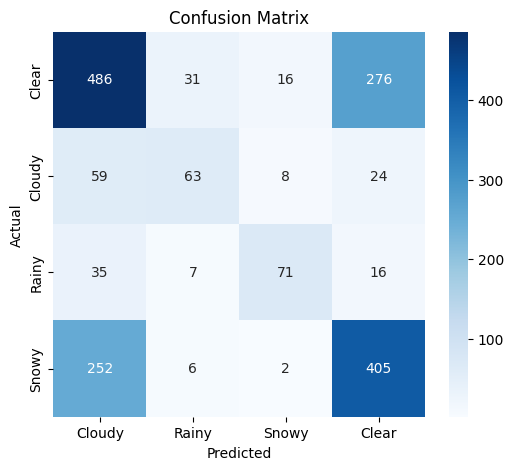

In [28]:
#checking the prediction performance using confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[ "Cloudy", "Rainy", "Snowy", "Clear"])

# Display as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cloudy","Rainy","Snowy","Clear"],
            yticklabels=["Clear","Cloudy","Rainy","Snowy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [29]:
# importing pickle
# save the file using sav extension
import pickle
filename="Knn.sav"
pickle.dump(reg,open(filename,"wb"))

In [30]:
# load the saved model in pickle
load_model=pickle.load(open("/content/Knn.sav","rb"))

In [31]:
# predicting the result
result=load_model.predict([[-1.8,	-3.9,	86,	4,	8.0, 101.24]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [32]:
# printing the result
result

array(['Cloudy'], dtype=object)